# <font color=red>Battle of Neighborhoods _(Week 1 & Week 2)_</font>

## 1. Description of the Problem and Discussion of the Background <br>
##     (Introduction Section, Week 1)

### Prospects of a Lunch Restaurant, Close to Office Areas in Tokyo, Japan.  

Tokyo, where I am currently staying, is the most populous metropolitan area in the world. Currently ranked 3rd in the global economic power index, Tokyo is definitely one of the best places to start up a new business. 

During the daytime, specially in the morning and lunch hours, office areas provide huge opportunities for restaurants. Reasonably priced (one lunch meal $ 8\text{\$} $) shops are usually always full during the lunch hours (11 am -- 2 pm) and, given this scenario, we will go through the benefits and pitfalls of opening a breakfast cum lunch restaurants in highly densed office places. Usually the profit margin for a decent restaurant lie within $15 - 20\% $ range but, it can even go high enough to $35\%$, as discussed [here](https://www.ichefpos.com/en-sg/blog/japanese-restaurants-profits). 

![Tokyo at Night](tokyo_night.jpg)



We will go through each step of this project and address them separately. For this week I just describe the initial data preparation and future steps to start the battle of neighborhoods in Tokyo. 

1. <font color=green> Obtain the Data </font> <br>

    1.a. Name of the 23 Wards, area and population from web scrapping <br>

    1.b. Obtain information about best business districts. <br>
    
    1.c. Use Foresquare Data to obtain info about restaurants. <br> 


2. <font color=green> Data Visualization and Some Simple Statistical Analysis. </font> 

3. <font color=green> Analysis Using Clustering, Specially K-Means Clustering. </font> <br>

    3.a. Maximize the number of clusters. <br>
    
    3.b. Visualization using Chloropleth Map <br>
    

4. <font color=green> Compare the Neighborhoods to Find the Best Place for Starting up a Restaurant. </font>   


5. <font color=green> Inference From these Results and related Conclusions. </font> <br>


<font color=orange>__Target Audience__</font>

1. Business personnel who wants to invest or open a restaurant. This analysis will be a comprehensive guide to <br>
   start  or expand restaurants targeting the large pool of office workers in Tokyo during lunch hours. 
2. Freelancer who loves to have their own restaurant as a side business. This analysis will give an idea, how <br>
   benificial it is to open a restaurant and what are the pros and cons of this business. 
3. New graduates, to find reasonable lunch/breakfast place close to office. 
4. Budding Data Scientists, who wants to implement some of the most used Exploratory Data Analysis techniques to <br>
   obtain necessary data, analyze it and, finally be able to tell a story out of it. 

## 2. Initial Data Preparation (Week 1)

#### 2.1. Get The Names of Wards, Major Districts and Population from Wikipedia <br>
#### 2.2. Processing the Information From Wiki To Make Necessary Lists <br>
#### 2.3. Get the Coordinates of the Major Districts <br>
#### 2.4. Check and Compare with Google Search and Refine if Necessary

I have described these steps detailed as a part of Week 1 Assignment in [a python notebook](https://github.com/suvoooo/Coursera_Capstone/blob/master/Week4/Capstone_Battle_of_Neighborhoods_Part1.ipynb), and also made a more comprehensible [.pdf](https://github.com/suvoooo/Coursera_Capstone/blob/master/Week4/Week4_Description_Include_Code.pdf) file. 

So here we start with using [Foursquare](https://developer.foursquare.com/) and use many Exploratory Data Analysis Techniques to learn from data and visualize to strengthen our understanding.   

## 3. Exploratory Data Analysis. (Week 2)

In [60]:
#Datapane will be used create a personal report for this code. Sign up on Datapane to get the token and sign in.

from IPython.display import Javascript

def window_open(url):
    display(Javascript('window.open("{url}");'.format(url=url)))


window_open('https://datapane.com/home')

<IPython.core.display.Javascript object>

In [ ]:
token = input('Insert your token after signing in Datapane ')
print('Your token is', token)

In [ ]:
!datapane login --server=https://datapane.com/ --token=$token

In [63]:
# import the necessary Libraries 
import sys
import requests
import json

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors


import io
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

### First, Get The Names of Wards, Major Districts and Population from Wikipedia (From Week 1)

In [64]:
response_obj = requests.get('https://en.wikipedia.org/wiki/Special_wards_of_Tokyo').text
soup = BeautifulSoup(response_obj,'lxml')
Wards_Tokyo_Table = soup.find('table', {'class':'wikitable sortable'})
### preparation of the table 

Name=[]
Kanji = []
Pop = []
Density = []
num = []
flag = []
Area = []
Major_District = []

for row in Wards_Tokyo_Table.findAll("tr"):
    #print (row)    
    Ward = row.findAll('td')
    #print (len(Ward))
    print (Ward)
    if len(Ward)==8: #Only extract table body not heading
        print (Ward[0])
        #print postcode[1]
        #print postcode[2]
        num.append(Ward[0].find(text=True))
        flag.append(Ward[1].findAll('a')) # useless
        Name.append(Ward[2])
        Kanji.append(Ward[3].find(text=True))
        Pop.append(Ward[4])
        Area.append(Ward[5].find(text=True))
        Major_District.append(Ward[7].find(text=True))
            
#print (Pop) 


#++++++++++++++++++++++++++++++++++++++++++++++
#+ Area 
#++++++++++++++++++++++++++++++++++++++++++++++

# print (Area[3]) # the first element of the area needs a replacement with the true value 5100
Area = ['5100' if x=='0' else x for x in Area]
New_Area = []

# change the type of Area list 
for l in range(len(Area)):
    x=Area[l].replace(",","")
    print (x)
    New_Area.append(x)

New_Area=[int(s) for s in New_Area]

#print (New_Area) # the list elements are already in accordance with the table

#+++++++++++++++++++++++++++++++++++++++++++++++++++++
#+ Name of the Wards
#+++++++++++++++++++++++++++++++++++++++++++++++++++++
#print (Name) # want to select only the title part

new_names = []
for n in range(len(Name)):
    print (Name[n])
    names = Name[n].findAll('a')
    new_names.append(names) 

print (new_names)

flat_new_names_list = [item for sublist in new_names for item in sublist]
print (flat_new_names_list)

Wards_names= []
#now 
for name_wards in flat_new_names_list:
        Wards_names.append(name_wards.get('title'))

print (Wards_names)

# replace the elements in the list that contains 'Tokyo' with only the ward names
replace_names={'Chiyoda, Tokyo':'Chiyoda', 'Chūō, Tokyo':'Chuo', 'Minato, Tokyo':'Minato', 
               'Sumida, Tokyo':'Sumida', 'Koto, Tokyo':'Koto', 'Ōta, Tokyo':'Ota', 'Nakano, Tokyo':'Nakano', 
               'Kita, Tokyo':'Kita', 'Arakawa, Tokyo':'Arakawa', 'Adachi, Tokyo':'Adachi', 'Edogawa, Tokyo':'Edogawa'}


Wards_names1 = [replace_names.get(n1,n1) for n1 in Wards_names]

#print (Wards_names1)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++
#+ Population
#+++++++++++++++++++++++++++++++++++++++++++++++++++++
# print (len(Pop))
# #print ((Pop[5].text))
population = []
for p in range(len(Pop)):
    print ((Pop[p]))
    pops = Pop[p].text[1:9]
    print (Pop[p].text[1:9])
    #populs = Pop[p].find('visibility:hidden;color:transparent;')
    population.append(pops) 
print (population)


New_population = []
for po in range(len(population)):
    xy=population[po].replace(",","")
    print (xy)
    New_population.append(xy)

New_population=[int(s1) for s1 in New_population]
# print (New_population)



#++++++++++++++++++++++++++++++++++++++++++++++++
#+ Major Districts
#++++++++++++++++++++++++++++++++++++++++++++++++


replace_districts = {'Nagatachō':'Nagatacho', 'Hongō':'Hongo', 'Kinshichō':'Kinshicho', 'Ōmori': 'Omori', 
                     'Kōenji':'Koenji', 'Arakawa, Machiya, ':'Arakawa', 'Ayase, ':'Ayase', 'Kasai, Koiwa\n':'Kasai'}


Major_District_names1 = [replace_districts.get(n2,n2) for n2 in Major_District]


df=pd.DataFrame(Wards_names1,columns=['Ward'])
df['Area_SqKm'] = New_Area
df['Population'] = New_population
df['Major_District'] = Major_District_names1
df.index = np.arange(1, len(df) + 1) # reset the index so that it starts from 1. 

# use of geopy geocoders
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Tokyo_explorer")
df['Major_Dist_Coord']= df['Major_District'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Major_Dist_Coord'].apply(pd.Series)

df.drop(['Major_Dist_Coord'], axis=1, inplace=True)
# replace some of the wrong coordinates 


Lat_list = df['Latitude'].tolist()
Long_list = df['Longitude'].tolist()
print ("Old latitude list: ", Lat_list)
print ("Old Longitude list: ", Long_list)
replace_latitudes = {32.5093796:35.7088, 23.0131338:35.6722, -38.9047057:35.5884, -5.3498001:35.6634}
replace_longitudes = {-116.2970014:139.7601, -80.8328748:139.8061, 175.7552111:139.7279, 21.424098:139.8731}

latitudes_new = [replace_latitudes.get(n3,n3) for n3 in Lat_list]
longtitudes_new = [replace_longitudes.get(n4,n4) for n4 in Long_list]
print (latitudes_new)
print (longtitudes_new)

Tokyo_df = df.drop(['Latitude', 'Longitude'], axis=1)
# #df.drop(['Longitude'], axis=1, inplace=True)
# Tokyo_df


Tokyo_df['Dist_Latitude'] = latitudes_new
Tokyo_df['Dist_Longitude'] = longtitudes_new

#Tokyo_df

#Tokyo_df.to_csv('Tokyo_df_Coord.csv')


[]
[<td>01</td>, <td><a class="image" href="/wiki/File:Flag_of_Chiyoda,_Tokyo.svg"><img alt="Flag of Chiyoda, Tokyo.svg" class="thumbborder" data-file-height="540" data-file-width="810" decoding="async" height="33" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Chiyoda%2C_Tokyo.svg/50px-Flag_of_Chiyoda%2C_Tokyo.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Chiyoda%2C_Tokyo.svg/75px-Flag_of_Chiyoda%2C_Tokyo.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Chiyoda%2C_Tokyo.svg/100px-Flag_of_Chiyoda%2C_Tokyo.svg.png 2x" width="50"/></a></td>, <td><a href="/wiki/Chiyoda,_Tokyo" title="Chiyoda, Tokyo">Chiyoda</a></td>, <td>千代田区
</td>, <td><span style="visibility:hidden;color:transparent;">0</span><span style="visibility:hidden;color:transparent;">0</span>59,441</td>, <td><span style="visibility:hidden;color:transparent;">0</span>5,100</td>, <td><span style="visibility:hidden;color:transparent;">0</span>11.66
</td>, <t

Old latitude list:  [35.675618, 35.68406775, 35.619050200000004, 35.6937632, 35.1753761, 35.7117587, 35.6963122, 23.0131338, 35.599252, 35.62125, 35.5884735, 35.646096, 35.6645956, 35.718123, 35.7049419, 35.7304418, 35.7781394, 35.737529, 35.774143, 35.74836, 35.4460475, 33.4817913, -5.3498001]
Old Longitude list:  [139.7434685, 139.77450291683806, 139.77936404588297, 139.7036319, 137.0134764, 139.7776445, 139.8150431, -80.8328748, 139.73891, 139.688014, 139.7279334, 139.65627, 139.6987107, 139.664468, 139.649909, 139.7107453, 139.7207999, 139.78131, 139.681209, 139.638735, 139.430823, 131.4781536, 21.424098]
[35.675618, 35.68406775, 35.619050200000004, 35.6937632, 35.1753761, 35.7117587, 35.6963122, 35.6722, 35.599252, 35.62125, 35.5884735, 35.646096, 35.6645956, 35.718123, 35.7049419, 35.7304418, 35.7781394, 35.737529, 35.774143, 35.74836, 35.4460475, 33.4817913, 35.6634]
[139.7434685, 139.77450291683806, 139.77936404588297, 139.7036319, 137.0134764, 139.7776445, 139.8150431, 139.806

### Starting of Week 2 

In [65]:
Tokyo_df = pd.read_csv('Tokyo_df_Coord.csv', index_col=[0])
#remove the unnamed column 
Tokyo_df.head(3)

,Ward,Area_SqKm,Population,Major_District,Dist_Latitude,Dist_Longitude
1,Chiyoda,5100,59441,Nagatacho,35.675618,139.743469
2,Chuo,14460,147620,Nihonbashi,35.684058,139.774501
3,Minato,12180,248071,Odaiba,35.619128,139.779403


Here we want to concentrate on the best five wards 

1. Chiyoda. Major District: _Nagatacho_<br>
2. Shinjuku. Major District: _Shinjuku_<br>
3. Shibuya. Major District: _Shibuya_<br>
4. Chuo. Major District: _Nihombashi_<br>
5. Shinagawa. Major District: _Shinagawa_<br>


So as the next step we will use [Foursquare](https://developer.foursquare.com/) data and obtain information on restaurants.  With these, we can start with our battle of neighborhoods for opening a restaurant in Tokyo.  

### Get the average land price in different areas of Tokyo from Web Scrapping

In [66]:
response_obj = requests.get('https://utinokati.com/en/details/land-market-value/area/Tokyo/').text
#print (type (response_obj))
soup = BeautifulSoup(response_obj,'lxml')
#print (soup.prettify())

In [67]:
Price_Tokyo_Table = soup.find('tbody')
#Price_Tokyo_Table

In [68]:
Name=[]
Avg_price = []


for row in Price_Tokyo_Table.findAll("tr"):
    
    price = row.findAll('td')
    Name.append(price[0].find(text=True))
    Avg_price.append(price[2].find(text=True))   

#print(Name)

price_df = pd.DataFrame(Name,columns=['Ward'])
price_df['Avg_price_sqKm'] = Avg_price




price_df['Avg_price_sqKm'] = price_df['Avg_price_sqKm'].map(lambda x: x.rstrip('JPY/sq.m').rstrip('0123456789'))

#print (price_df.dtypes)
# Change the average price column datatype 
Avg_price_list = price_df['Avg_price_sqKm'].tolist()
New_Avg_price = []

for pr in range(len(Avg_price_list)):
    x = Avg_price_list[pr].replace(",", "")
    New_Avg_price.append(x)


Avg_price_new=[int(s) for s in New_Avg_price]

price_df.drop(['Avg_price_sqKm'], axis=1, inplace=True)

price_df['Average_Price(SqKm)'] = New_Avg_price

price_df

,Ward,Average_Price(SqKm)
0,Chiyoda-Ku,2705898
1,Chuo-Ku,2699719
2,Minato-Ku,2121252
3,Shinjuku-Ku,939286
4,Bunkyo-Ku,945155
5,Taito-Ku,1064759
6,Sumida-Ku,617190
7,Koto-Ku,658047
8,Shinagawa-Ku,767398
9,Meguro-Ku,863712


In [69]:
## Select info only for 5 relevant wards Chiyoda, Chuo, Shinjuku, Shibuya, Shinagawa. 
## 
pd.options.mode.chained_assignment = None
ward_list = ['Chiyoda-Ku', 'Chuo-Ku', 'Shinjuku-Ku', 'Shibuya-Ku', 'Shinagawa-Ku']
price_df_selected = price_df.loc[price_df['Ward'].isin(ward_list)]
price_df_selected.index = np.arange(1, len(price_df_selected) + 1)
#Ward_names = price_df_selected['Ward'].map(lambda y: str(y)[:-3]) # strip -Ku from the ward names
price_df_selected['Ward']=price_df_selected['Ward'].map(lambda y: str(y)[:-3]) 
#price_df_selected.drop(['Ward'], axis=1, inplace=True)
#price_df_selected['Ward']=Ward_names
price_df_selected

,Ward,Average_Price(SqKm)
1,Chiyoda,2705898
2,Chuo,2699719
3,Shinjuku,939286
4,Shinagawa,767398
5,Shibuya,1360332


In [70]:
## Similarly select those five wards from the Tokyo Wards Data-Frame
ward_list1 = ['Chiyoda', 'Chuo', 'Shinjuku', 'Shibuya', 'Shinagawa']
Tokyo_df_selected = Tokyo_df.loc[Tokyo_df['Ward'].isin(ward_list1)]
Tokyo_df_selected

,Ward,Area_SqKm,Population,Major_District,Dist_Latitude,Dist_Longitude
1,Chiyoda,5100,59441,Nagatacho,35.675618,139.743469
2,Chuo,14460,147620,Nihonbashi,35.684058,139.774501
4,Shinjuku,18620,339211,Shinjuku,35.693763,139.703632
9,Shinagawa,17180,392492,Shinagawa,35.599252,139.738910
13,Shibuya,15080,227850,Shibuya,35.664596,139.698711


In [71]:
# Merge the two dataframes according to the ward names 

Tokyo_df_selected_final = Tokyo_df_selected.merge(price_df_selected, on='Ward', how='left')
Tokyo_df_selected_final.index = np.arange(1, len(Tokyo_df_selected_final)+1)
Tokyo_df_selected_final.to_csv('Tokyo_5_Wards.csv')
Tokyo_df_selected_final

,Ward,Area_SqKm,Population,Major_District,Dist_Latitude,Dist_Longitude,Average_Price(SqKm)
1,Chiyoda,5100,59441,Nagatacho,35.675618,139.743469,2705898
2,Chuo,14460,147620,Nihonbashi,35.684058,139.774501,2699719
3,Shinjuku,18620,339211,Shinjuku,35.693763,139.703632,939286
4,Shinagawa,17180,392492,Shinagawa,35.599252,139.738910,767398
5,Shibuya,15080,227850,Shibuya,35.664596,139.698711,1360332


In [72]:
# get Tokyo, Tokyo Latitude and Longitude 

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'Tokyo'

geolocator = Nominatim(user_agent="Tokyo_explorer")
location = geolocator.geocode(address)
Tokyo_latitude = location.latitude
Tokyo_longitude = location.longitude
print('The geograpical coordinates of Tokyo are {}, {}.'.format(Tokyo_latitude, Tokyo_longitude))

The geograpical coordinates of Tokyo are 35.6828387, 139.7594549.


In [73]:
import folium
# # create map of Most Busy Office Areas of Tokyo using latitude and longitude values
Tokyo_5Wards = folium.Map(location=[Tokyo_latitude, Tokyo_longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(Tokyo_df_selected_final['Dist_Latitude'], Tokyo_df_selected_final['Dist_Longitude'], 
                           Tokyo_df_selected_final['Major_District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Tokyo_5Wards)  
    
Tokyo_5Wards

#### The 5 Neighbourhoods (Chiyoda, Chuo, Shinjuku, Shibuya, Shinagawa) that are ready to battle for the best place to open a lunch restaurant looks as below in Map, obtained using Folium 

![Tokyo_5_Wards](Tokyo_5_Wards.png)

### Getting Ready to Use FourSquare API 

In [ ]:
# Sign up on https://foursquare.com/ to get the client ID and client secret

CLIENT_ID = 'YOURCLIENTID' #'your-client-ID' # your Foursquare ID
CLIENT_SECRET = 'YOURCLIENTSECRET' #'your-client-secret' # your Foursquare Secret
VERSION = '20190325' # Foursquare API version

print('My credentails:')
print('My CLIENT_ID: ' + CLIENT_ID)
print('My CLIENT_SECRET:' + CLIENT_SECRET)

#### To decide which neighborhood (read 'Ward') is best for opening a restaurant, We will explore the areas around the major districts. <br> (Chiyoda: Nagatacho, Chuo: Nihonbashi, Shinjuku: Shinjuku, Shibuya: Shibuya, Shinagawa:Shinagawa) 

### Exploring the Major Districts 

1. Create the get request url (Foursquare ID and Secret are necessary) <br>
    1.a. Number of Venues we will look for is 100
    2.a. Radius of Search Would be 1 k.m. 
2. Create a json from  the request object (Need requests Module) <br>
3. Create the lists Containing all the information <br>
4. From the lists create the dataframe. 

In [75]:
radius = 1000
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Dist_Latitude', 
                  'Dist_Longitude', 
                  'Venue', 
                  'Venue_Lat', 
                  'Venue_Long', 
                  'Venue_Category']
    
    return(nearby_venues)

#### Use the Function Above to Create the Dataframe of Venues Around Those 5 Major Districts Belonging to the Busiest Wards of Tokyo 

In [76]:


Tokyo_5_Dist_Venues = getNearbyVenues(names=Tokyo_df_selected_final['Major_District'],
                                   latitudes=Tokyo_df_selected_final['Dist_Latitude'],
                                   longitudes=Tokyo_df_selected_final['Dist_Longitude']
                                  )

Nagatacho
Nihonbashi
Shinjuku
Shinagawa
Shibuya


In [77]:
print ("Shape of the Venues Dataframe: ", Tokyo_5_Dist_Venues.shape)
Tokyo_5_Dist_Venues.tail(3)

Shape of the Venues Dataframe:  (500, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
497,Shibuya,35.664596,139.698711,Chez Matsuo (シェ松尾 松濤レストラン),35.660804,139.692413,French Restaurant
498,Shibuya,35.664596,139.698711,Isari Juhachiban (漁十八番),35.658858,139.698396,Seafood Restaurant
499,Shibuya,35.664596,139.698711,Lindt Chocolat Café (リンツ ショコラ カフェ),35.659580,139.701526,Chocolate Shop


In [78]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 

Tokyo_5_Dist_Venues_only_restaurant = Tokyo_5_Dist_Venues[Tokyo_5_Dist_Venues['Venue_Category']\
                                                          .str.contains('Restaurant')].reset_index(drop=True)
Tokyo_5_Dist_Venues_only_restaurant.index = np.arange(1, len(Tokyo_5_Dist_Venues_only_restaurant)+1)
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Tokyo_5_Dist_Venues_only_restaurant.shape)
Tokyo_5_Dist_Venues_only_restaurant.head(3)

Shape of the Data-Frame with Venue Category only Restaurant:  (184, 7)


,District,Dist_Latitude,Dist_Longitude,Venue,Venue_Lat,Venue_Long,Venue_Category
1,Nagatacho,35.675618,139.743469,Nagatacho Kurosawa (永田町 黒澤),35.674699,139.741737,Japanese Restaurant
2,Nagatacho,35.675618,139.743469,Shinamen Hashigo (支那麺 はしご),35.672184,139.741576,Ramen Restaurant
3,Nagatacho,35.675618,139.743469,Sushi Isshin (鮨 一新),35.672589,139.739399,Sushi Restaurant


In [79]:
import datapane as dp 

# A list to create a Datapane report later
report = []

In [80]:
## Show in Map the Top Rated Restaruants in the Top 5 Districts

map_restaurants = folium.Map(location=[Tokyo_latitude, Tokyo_longitude], zoom_start=11, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the Venues based on the Major Districts
Districts = ['Nagatacho', 'Nihonbashi', 'Shinjuku', 'Shinagawa', 'Shibuya']

x = np.arange(len(Districts))

rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']

# add markers to the map
# markers_colors = []
for lat, lon, poi, distr in zip(Tokyo_5_Dist_Venues_only_restaurant['Venue_Lat'], 
                                  Tokyo_5_Dist_Venues_only_restaurant['Venue_Long'], 
                                  Tokyo_5_Dist_Venues_only_restaurant['Venue_Category'], 
                                  Tokyo_5_Dist_Venues_only_restaurant['District']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[Districts.index(distr)-1],
        fill=True,
        fill_color=rainbow[Districts.index(distr)-1],
        fill_opacity=0.3).add_to(map_restaurants)
       
map_restaurants

In [81]:
report.append(dp.Plot(map_restaurants))

#### See the Most Frequently Visited Restaurants in the Best Five Districts of Tokyo. 
![Tokyo_all_restaurants](Most_Visited_Restaurants_Tokyo.png)

In [82]:
### Number of Unique Categories in the Dataframe 
print('There are {} unique categories.'.format(len(Tokyo_5_Dist_Venues['Venue_Category'].unique())))
## We can check some of the categories randomly  
print (Tokyo_5_Dist_Venues[['Venue_Category']][70:75])

There are 136 unique categories.
       Venue_Category
70   Sushi Restaurant
71  Korean Restaurant
72            Theater
73         Steakhouse
74             Lounge


#### We have seen that there are 134 unique categories in the Venues Data-Frame. <br> Let's see the Frequency of Each Category 

In [83]:
print (Tokyo_5_Dist_Venues['Venue_Category'].value_counts())

BBQ Joint                    26
Japanese Restaurant          25
Sake Bar                     22
Ramen Restaurant             20
Café                         18
                             ..
Deli / Bodega                 1
Souvenir Shop                 1
Hostel                        1
Karaoke Bar                   1
Japanese Curry Restaurant     1
Name: Venue_Category, Length: 136, dtype: int64


#### Create a Data-frame with the 10 Most Frequently Occuring Venue_Category 

In [84]:
# create a dataframe of top 10 categories
Tokyo_5_Dist_Venues_Top10 = Tokyo_5_Dist_Venues['Venue_Category'].value_counts()[0:10].to_frame(name='frequency')
Tokyo_5_Dist_Venues_Top10=Tokyo_5_Dist_Venues_Top10.reset_index()
#Tokyo_5_Dist_Venues_Top10

Tokyo_5_Dist_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Tokyo_5_Dist_Venues_Top10

,Venue_Category,Frequency
0,BBQ Joint,26
1,Japanese Restaurant,25
2,Sake Bar,22
3,Ramen Restaurant,20
4,Café,18
5,Bar,17
6,Hotel,15
7,Sushi Restaurant,14
8,Convenience Store,14
9,French Restaurant,13


In [85]:
!pip install seaborn

You should consider upgrading via the '/home/khuyentran/anaconda3/envs/scraping/bin/python -m pip install --upgrade pip' command.


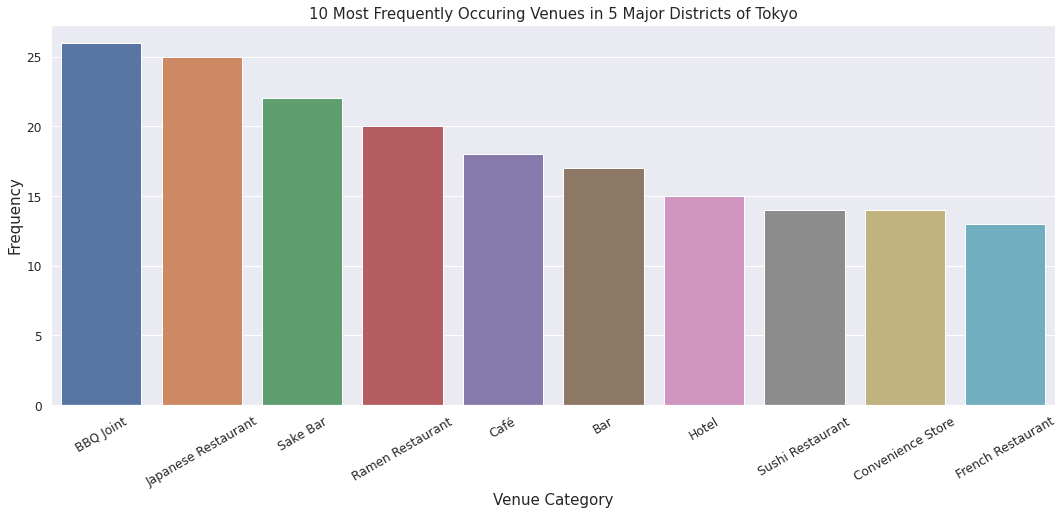

In [86]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="Frequency", data=Tokyo_5_Dist_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in 5 Major Districts of Tokyo', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

In [87]:
report.append(dp.Plot(fig))

### Ramen Restaurant is one of the Most Frequent Venues in 5 Major Districts of Tokyo. <br> 


### Break Time for Ramen 

![tonkotsu](tonkotsu_ramen.jpg)

In [88]:
### Use One Hot Encoding to Get More Information about the Venue Categories 
Tokyo_5_Dist_Venues_onehot = pd.get_dummies(Tokyo_5_Dist_Venues[['Venue_Category']], prefix="", prefix_sep="")

### add district column back to dataframe
Tokyo_5_Dist_Venues_onehot['District'] = Tokyo_5_Dist_Venues['District'] 
### move district column to the first column
fixed_columns = [Tokyo_5_Dist_Venues_onehot.columns[-1]] + list(Tokyo_5_Dist_Venues_onehot.columns[:-1])
Tokyo_5_Dist_Venues_onehot = Tokyo_5_Dist_Venues_onehot[fixed_columns]
###Tokyo_5_Dist_Venues_onehot.head(3)

In [89]:
Tokyo_5_Dist_Venues_Grouped = Tokyo_5_Dist_Venues_onehot.groupby('District').mean().reset_index()
Tokyo_5_Dist_Venues_Grouped.index = np.arange(1, len(Tokyo_5_Dist_Venues_Grouped)+1)
Tokyo_5_Dist_Venues_Grouped

,District,Accessories Store,African Restaurant,American Restaurant,Art Gallery,Art Museum,Asian Restaurant,BBQ Joint,Bakery,Bar,...,Trail,Train Station,Udon Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Wagashi Place,Whisky Bar,Wine Bar,Yakitori Restaurant,Yoshoku Restaurant
1,Nagatacho,0.00,0.00,0.02,0.00,0.00,0.00,0.06,0.01,0.03,...,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.03,0.02
2,Nihonbashi,0.00,0.00,0.00,0.01,0.01,0.00,0.06,0.03,0.01,...,0.00,0.00,0.02,0.02,0.00,0.03,0.00,0.00,0.01,0.01
3,Shibuya,0.01,0.01,0.01,0.00,0.01,0.01,0.02,0.01,0.04,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.00
4,Shinagawa,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.01,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02
5,Shinjuku,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.08,...,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.02,0.02


In [90]:
num_top_venues = 5

for places in Tokyo_5_Dist_Venues_Grouped['District']:
    print("%%%%%%%%%"+places+"%%%%%%%%")
    temp = Tokyo_5_Dist_Venues_Grouped[Tokyo_5_Dist_Venues_Grouped['District'] == places].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

%%%%%%%%%Nagatacho%%%%%%%%
                 Venue  Freq
0  Japanese Restaurant  0.09
1          Coffee Shop  0.06
2                Hotel  0.06
3            BBQ Joint  0.06
4   Chinese Restaurant  0.06


%%%%%%%%%Nihonbashi%%%%%%%%
                 Venue  Freq
0  Japanese Restaurant  0.08
1            BBQ Joint  0.06
2                 Café  0.05
3    French Restaurant  0.04
4                Hotel  0.04


%%%%%%%%%Shibuya%%%%%%%%
               Venue  Freq
0               Café  0.08
1        Record Shop  0.06
2  French Restaurant  0.05
3        Coffee Shop  0.04
4                Bar  0.04


%%%%%%%%%Shinagawa%%%%%%%%
               Venue  Freq
0  Convenience Store  0.14
1   Ramen Restaurant  0.08
2           Sake Bar  0.07
3      Grocery Store  0.05
4          BBQ Joint  0.05


%%%%%%%%%Shinjuku%%%%%%%%
                 Venue  Freq
0             Sake Bar  0.09
1                  Bar  0.08
2            BBQ Joint  0.07
3     Ramen Restaurant  0.05
4  Japanese Restaurant  0.05




#### Create a DataFrame with Top 10 Venues for Each District 

In [91]:
## Define a Function to select the top 10 rows (According to the Values) 

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
District_top10_venues_sorted = pd.DataFrame(columns=columns)
District_top10_venues_sorted['District'] = Tokyo_5_Dist_Venues_Grouped['District']

for ind in np.arange(Tokyo_5_Dist_Venues_Grouped.shape[0]):
    District_top10_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Tokyo_5_Dist_Venues_Grouped.iloc[ind, :], num_top_venues)

    
District_top10_venues_sorted.index = np.arange(1, len(District_top10_venues_sorted)+1)
District_top10_venues_sorted.head(5)

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Nagatacho,Japanese Restaurant,Hotel,BBQ Joint,Coffee Shop,Chinese Restaurant,Sake Bar,Theater,Italian Restaurant,Yakitori Restaurant,Bar
2,Nihonbashi,Japanese Restaurant,BBQ Joint,Café,Hotel,Hobby Shop,French Restaurant,Department Store,Bakery,Soba Restaurant,Sushi Restaurant
3,Shibuya,Café,Record Shop,French Restaurant,Coffee Shop,Bar,Ramen Restaurant,Sushi Restaurant,Japanese Restaurant,Seafood Restaurant,Chinese Restaurant
4,Shinagawa,Convenience Store,Ramen Restaurant,Sake Bar,Grocery Store,BBQ Joint,Sushi Restaurant,Donburi Restaurant,Park,Restaurant,Soba Restaurant
5,Shinjuku,Sake Bar,Bar,BBQ Joint,Ramen Restaurant,Japanese Restaurant,Pub,Rock Club,Department Store,Record Shop,Noodle House


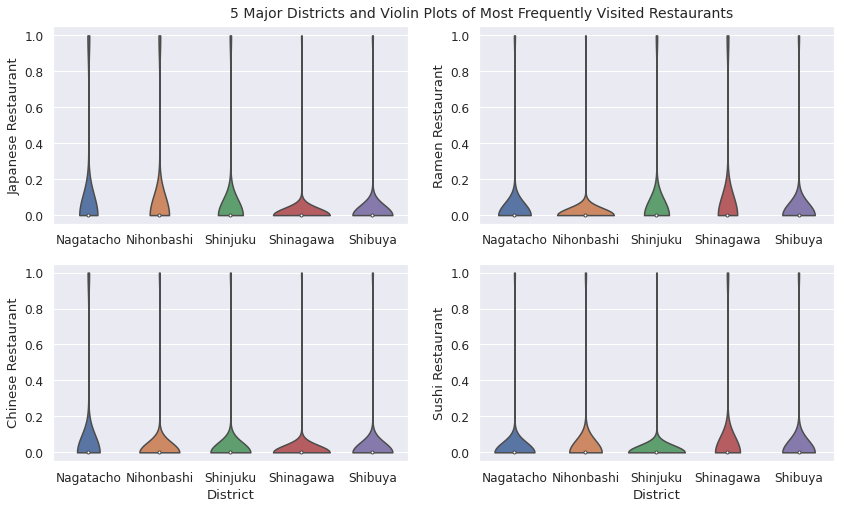

In [92]:
# Let's try Categorical plot 


fig = plt.figure(figsize=(14,8))

sns.set(font_scale=1.1)
ax = plt.subplot(2,2,1)
sns.violinplot(x="District", y="Japanese Restaurant", data=Tokyo_5_Dist_Venues_onehot, cut=0);
plt.xlabel("")
ax = plt.subplot(2,2,2)
sns.violinplot(x="District", y="Ramen Restaurant", data=Tokyo_5_Dist_Venues_onehot, cut=0);
plt.xlabel("")
plt.subplot(2,2,3)
sns.violinplot(x="District", y="Chinese Restaurant", data=Tokyo_5_Dist_Venues_onehot, cut=0);
plt.subplot(2,2,4)
sns.violinplot(x="District", y="Sushi Restaurant", data=Tokyo_5_Dist_Venues_onehot, cut=0);
#ax.title.set_text("5 Major Districts and Violin Plots of Most Frequently Visited Restaurants")
ax.text(-4.0, 1.1, '5 Major Districts and Violin Plots of Most Frequently Visited Restaurants', fontsize=14)
plt.savefig ("Violin_plots_Dist_Frequent_Restaurant.png", dpi=240)
plt.show()

In [93]:
report.append(dp.Plot(fig))

[53, 40, 29, 33, 29]


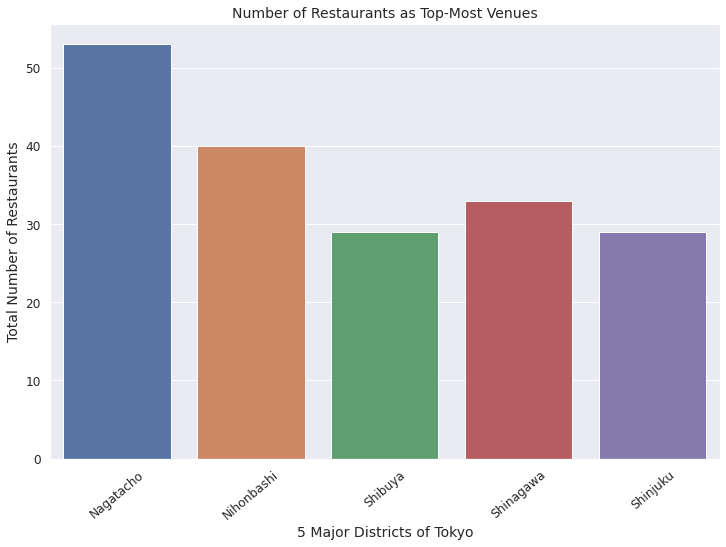

In [94]:
#try groupby to play with restaurant 
Tokyo_5_Dist_Venues_restaurant = Tokyo_5_Dist_Venues.groupby(['District'])['Venue_Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
Tokyo_5_Dist_Venues_restaurant_df = Tokyo_5_Dist_Venues_restaurant.to_frame().reset_index()
Tokyo_5_Dist_Venues_restaurant_df.columns = ['District', 'Number of Restaurant']
#Tokyo_5_Dist_Venues_restaurant.columns = ['District', 'Number of Restaurant']
#print (type(Tokyo_5_Dist_Venues_restaurant))
Tokyo_5_Dist_Venues_restaurant_df.index = np.arange(1, len(Tokyo_5_Dist_Venues_restaurant_df)+1)

#print ("shape of the dataframe: ", Tokyo_5_Dist_Venues_restaurant_df.shape)
#print (Tokyo_5_Dist_Venues_restaurant_df.head(5))
#print (type(Tokyo_5_Dist_Venues_restaurant_df[['Number of Restaurant']]))
list_rest_no = Tokyo_5_Dist_Venues_restaurant_df['Number of Restaurant'].to_list()
print (list_rest_no)
fig = plt.figure(figsize=(12,8))
bar = sns.barplot(x='District', y='Number of Restaurant', data=Tokyo_5_Dist_Venues_restaurant_df)

bar.set_ylabel("Total Number of Restaurants", fontsize=14)
bar.set_xlabel("5 Major Districts of Tokyo", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Restaurants as Top-Most Venues", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()

In [95]:
report.append(dp.Plot(fig))

### Clustering the Tokyo Districts (Neighborhoods) using _K-Means_

In [96]:
# set number of clusters
kclusters = 3

Tokyo_grouped_clustering = Tokyo_5_Dist_Venues_Grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Tokyo_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print ("Check the 5 Cluster labels :",  kmeans.labels_[0:5]) 

Check the 5 Cluster labels : [0 0 2 1 2]


In [97]:
# add clustering labels

District_top10_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

Tokyo_5_Dist_Coordinate_Cluster_merged = Tokyo_df_selected_final

#merge the inital Tokyo Dataframe with Sorted Most Visited places for each neighborhood

Tokyo_5_Dist_Coordinate_Cluster_merged = Tokyo_5_Dist_Coordinate_Cluster_merged.join \
                                        (District_top10_venues_sorted.set_index('District'), on='Major_District')

Tokyo_5_Dist_Coordinate_Cluster_merged.head() 

,Ward,Area_SqKm,Population,Major_District,Dist_Latitude,Dist_Longitude,Average_Price(SqKm),Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chiyoda,5100,59441,Nagatacho,35.675618,139.743469,2705898,0,Japanese Restaurant,Hotel,BBQ Joint,Coffee Shop,Chinese Restaurant,Sake Bar,Theater,Italian Restaurant,Yakitori Restaurant,Bar
2,Chuo,14460,147620,Nihonbashi,35.684058,139.774501,2699719,0,Japanese Restaurant,BBQ Joint,Café,Hotel,Hobby Shop,French Restaurant,Department Store,Bakery,Soba Restaurant,Sushi Restaurant
3,Shinjuku,18620,339211,Shinjuku,35.693763,139.703632,939286,2,Sake Bar,Bar,BBQ Joint,Ramen Restaurant,Japanese Restaurant,Pub,Rock Club,Department Store,Record Shop,Noodle House
4,Shinagawa,17180,392492,Shinagawa,35.599252,139.738910,767398,1,Convenience Store,Ramen Restaurant,Sake Bar,Grocery Store,BBQ Joint,Sushi Restaurant,Donburi Restaurant,Park,Restaurant,Soba Restaurant
5,Shibuya,15080,227850,Shibuya,35.664596,139.698711,1360332,2,Café,Record Shop,French Restaurant,Coffee Shop,Bar,Ramen Restaurant,Sushi Restaurant,Japanese Restaurant,Seafood Restaurant,Chinese Restaurant


In [98]:
# create map
map_clusters = folium.Map(location=[Tokyo_latitude, Tokyo_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Tokyo_5_Dist_Coordinate_Cluster_merged['Dist_Latitude'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['Dist_Longitude'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['Major_District'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [99]:
report.append(dp.Plot(map_clusters))

In [100]:
# create map
map_restaurants10 = folium.Map(location=[Tokyo_latitude, Tokyo_longitude], tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
Districts = ['Nagatacho', 'Nihonbashi', 'Shinjuku', 'Shinagawa', 'Shibuya']

# add markers to the map
for lat, lon, poi, cluster in zip(Tokyo_5_Dist_Coordinate_Cluster_merged['Dist_Latitude'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['Dist_Longitude'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['Major_District'], 
                                  Tokyo_5_Dist_Coordinate_Cluster_merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[Districts.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

In [101]:
report.append(dp.Plot(map_restaurants10))

#### Final Map of 3 Clusters With Radius of the Clusters Representing Number of Restaurants in Each District
![Tokyo_Final_Clusters](Tokyo_District_Clusters.png)

### Explore the 3 Clusters 

#### Cluster 0

In [102]:
Tokyo_Cluster1 = Tokyo_5_Dist_Coordinate_Cluster_merged.loc[Tokyo_5_Dist_Coordinate_Cluster_merged['Cluster Label'] == 0, 
                                    Tokyo_5_Dist_Coordinate_Cluster_merged.columns[[3] + list(range(4, Tokyo_5_Dist_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 0: %d" %(Tokyo_Cluster1.shape[0]))
Tokyo_Cluster1

No of Neighbourhood in Cluster Label 0: 2


,Major_District,Dist_Latitude,Dist_Longitude,Average_Price(SqKm),Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Nagatacho,35.675618,139.743469,2705898,0,Japanese Restaurant,Hotel,BBQ Joint,Coffee Shop,Chinese Restaurant,Sake Bar,Theater,Italian Restaurant,Yakitori Restaurant,Bar
2,Nihonbashi,35.684058,139.774501,2699719,0,Japanese Restaurant,BBQ Joint,Café,Hotel,Hobby Shop,French Restaurant,Department Store,Bakery,Soba Restaurant,Sushi Restaurant


#### Cluster 1

In [103]:
Tokyo_Cluster2 = Tokyo_5_Dist_Coordinate_Cluster_merged.loc[Tokyo_5_Dist_Coordinate_Cluster_merged['Cluster Label'] == 1, 
                                    Tokyo_5_Dist_Coordinate_Cluster_merged.columns[[3] + list(range(4, Tokyo_5_Dist_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 1: %d" %(Tokyo_Cluster2.shape[0]))
Tokyo_Cluster2

No of Neighbourhood in Cluster Label 1: 1


,Major_District,Dist_Latitude,Dist_Longitude,Average_Price(SqKm),Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Shinagawa,35.599252,139.73891,767398,1,Convenience Store,Ramen Restaurant,Sake Bar,Grocery Store,BBQ Joint,Sushi Restaurant,Donburi Restaurant,Park,Restaurant,Soba Restaurant


#### Cluster 2

In [104]:
Tokyo_Cluster3 = Tokyo_5_Dist_Coordinate_Cluster_merged.loc[Tokyo_5_Dist_Coordinate_Cluster_merged['Cluster Label'] == 2, 
                                    Tokyo_5_Dist_Coordinate_Cluster_merged.columns[[3] + list(range(4, Tokyo_5_Dist_Coordinate_Cluster_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 2: %d" %(Tokyo_Cluster3.shape[0]))
Tokyo_Cluster3

No of Neighbourhood in Cluster Label 2: 2


,Major_District,Dist_Latitude,Dist_Longitude,Average_Price(SqKm),Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Shinjuku,35.693763,139.703632,939286,2,Sake Bar,Bar,BBQ Joint,Ramen Restaurant,Japanese Restaurant,Pub,Rock Club,Department Store,Record Shop,Noodle House
5,Shibuya,35.664596,139.698711,1360332,2,Café,Record Shop,French Restaurant,Coffee Shop,Bar,Ramen Restaurant,Sushi Restaurant,Japanese Restaurant,Seafood Restaurant,Chinese Restaurant


In [108]:
report.insert(0, dp.Markdown(f'''
[Original article](https://towardsdatascience.com/exploring-the-tokyo-neighborhoods-data-science-in-real-life-8b6c2454ca16)

[Source code](https://github.com/khuyentran1401/Coursera_Capstone/blob/master/Week5/Capstone_Week4_Part2.ipynb)

[Run on Binder](https://mybinder.org/v2/gh/khuyentran1401/Coursera_Capstone/045bdda48e3e5c947e4f73406de0d877ac741aa2?filepath=Week5%2FCapstone_Week4_Part2.ipynb)
'''))

In [109]:
dp.Report(*report).publish(name='tokyo',
                           headline='Exploring the Tokyo Neighbourhoods'
                          )

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/saptashwa/reports/tokyo_5163ce30/
